In [13]:
import numpy as np
import matplotlib.pyplot as plt
from util import *

In [14]:
N = 50
mx1 = 1
my1 = 1
mx2 = 3
my2 = 3
vx1 = 2
vy1 = 2
vx2 = 4
vy2 = 4

In [15]:
def plot(C0,C1,title):
    plt.figure()
    plt.plot(C0[:, 0],C0[:, 1],'ro')
    plt.plot(C1[:, 0],C1[:, 1],'bo')
    plt.title(title)
    plt.show()

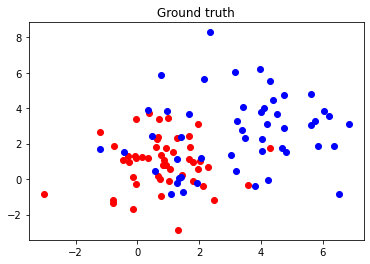

In [16]:
D1 = np.empty((N,2))
D2 = np.empty((N,2))
for i in range(N):
    x = gaussian_data_generator(mx1, vx1)
    y = gaussian_data_generator(my1, vy1)
    D1[i, 0] = x
    D1[i, 1] = y
    x = gaussian_data_generator(mx2, vx2)
    y = gaussian_data_generator(my2, vy2)
    D2[i, 0] = x
    D2[i, 1] = y
#print(D1)
plot(D1, D2, 'Ground truth')
A = np.vstack((D1, D2))
A = np.concatenate((A, np.ones((2*N, 1))), axis=1)
b = np.zeros((2 * N, 1))
b[N:] = np.ones((N, 1))
#print(b)

Gradient descent:

w:
[8.04215984]
[6.75914678]
[-7.71108796]
Confusion Matrix:
               Predict cluster 1  Predict cluster 2
Is cluster 1        15               35       
Is cluster 2        4               46       

Sensitivity (Successfully predict cluster 1): 0.3
Specificity (Successfully predict cluster 2): 0.92


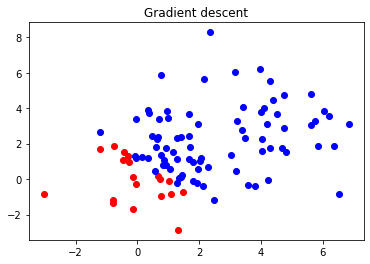

In [17]:
w = np.random.rand(3, 1)
w_gradient = run_gradient(A, w, b, lr=0.1)

#print
print('Gradient descent:\n')
b_predict = predict(A, w_gradient)
matrix, C0_predict, C1_predict = confusion_matrix(A, b, b_predict)
print('w:')
print(w_gradient[0])
print(w_gradient[1])
print(w_gradient[2])
print_confusion_matrix(matrix)
plot(C0_predict,C1_predict,'Gradient descent')




----------------------------------------
Newton's method:
w:
[0.84598473]
[0.40634204]
[-2.23012168]
Confusion Matrix:
               Predict cluster 1  Predict cluster 2
Is cluster 1        45               5       
Is cluster 2        13               37       

Sensitivity (Successfully predict cluster 1): 0.9
Specificity (Successfully predict cluster 2): 0.74


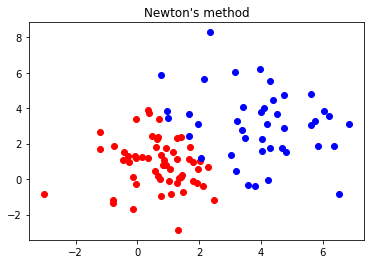

In [18]:
#newton's method
w = np.random.rand(3,1)
w_Newton = run_Newton(A, w, b, lr=0.1)

#print
print('\n----------------------------------------')
print('Newton\'s method:')
b_predict = predict(A, w_Newton)
matrix, C0_predict, C1_predict = confusion_matrix(A, b, b_predict)
print('w:')
print(w_Newton[0])
print(w_Newton[1])
print(w_Newton[2])
print_confusion_matrix(matrix)
plot(C0_predict,C1_predict,'Newton\'s method')